#Optimization problem
>[wiki](https://en.wikipedia.org/wiki/Optimization_problem) <br>

>The standard form of a continuous optimization problem is[1]

>$$
\begin{aligned}&{\underset {x}{\operatorname {minimize} }}&&f(x)\\&\operatorname {subject\;to} &&g_{i}(x)\leq 0,\quad i=1,\dots ,m\\&&&h_{j}(x)=0,\quad j=1,\dots ,p\end{aligned}
$$


>where :

> * $ f:\mathbb {R} ^{n}\to \mathbb {R}  $  is the objective function to be minimized over the n-variable vector $ {\displaystyle x},$<br>
> * $g_{i}(x)\leq 0 $are called inequality constraints<br>
> * ${\displaystyle h_{j}(x)=0}$ are called equality constraints, and ${\displaystyle m\geq 0\ and\ p\geq 0}.$<br>

>If ${\displaystyle m}$ and ${\displaystyle p}$ equal 0, the problem is an unconstrained optimization problem. 
By convention, the standard form defines a minimization problem. A maximization problem can be treated by negating the objective function.



---



#Calculus I - Optimization - Pauls Online Math Notes

> We need to enclose a rectangular field with a fence. We have 500 feet of fencing material and a building is on one side of the field and so won’t need any fencing. Determine the dimensions of the field that will enclose the largest area.


1. Define the optimization problem by Mathematic equations.

2. one variable  method: using constraint to replace one variable 

>>2.1 run tensorflow gradient descent to answer the question.

>>2.2 run genetic algorithm answer the question.

>In all of these problems we will have two functions. The first is the function that we are actually trying to optimize and the second will be the constraint. Sketching the situation will often help us to arrive at these equations so let’s do that.

>![img](http://tutorial.math.lamar.edu/Classes/CalcI/Optimization_Files/image001.png)




>In this problem we want to maximize the area of a field and we know that will use 500 ft of fencing material. So, the area will be the function we are trying to optimize and the amount of fencing is the constraint. The two equations for these are,

$$
\begin{align*}{\mbox{Maximize : }} & A = xy\\ {\mbox{Constraint : }} & 500 = x + 2y\end{align*}
$$

>Okay, we know how to find the largest or smallest value of a function provided it’s only got a single variable. The area function (as well as the constraint) has two variables in it and so what we know about finding absolute extrema won’t work. However, if we solve the constraint for one of the two variables we can substitute this into the area and we will then have a function of a single variable.

>So, let’s solve the constraint for $x$.
>Note that we could have just as easily solved for $y$ but that would have led to fractions and so, in this case, solving for $ x $  will probably be best.
$$
x = 500 - 2y
$$

> Substituting this into the area function gives a function of $y$.

$$
A\left( y \right) = \left( {500 - 2y} \right)y = 500y - 2{y^2}
$$

>Now we want to find the largest value this will have on the interval $[0,250]$. The limits in this interval corresponds to taking $y=0$ . (i.e. no sides to the fence) and $y = 250$  (i.e. only two sides and no width, also if there are two sides each must be 250 ft to use the whole 500ft).

>Note that the endpoints of the interval won’t make any sense from a physical standpoint if we actually want to enclose some area because they would both give zero area. They do, however, give us a set of limits on $y$ and so the Extreme Value Theorem tells us that we will have a maximum value of the area somewhere between the two endpoints. Having these limits will also mean that we can use the process we discussed in the Finding Absolute Extrema section earlier in the chapter to find the maximum value of the area.

>So, recall that the maximum value of a continuous function (which we’ve got here) on a closed interval (which we also have here) will occur at critical points and/or end points. As we’ve already pointed out the end points in this case will give zero area and so don’t make any sense. That means our only option will be the critical points.

>So, let’s get the derivative and find the critical points.

$$
A'\left( y \right) = 500 - 4y
$$

>Setting this equal to zero and solving gives a lone critical point of $y=125$. Plugging this into the area gives an area of $A(125)=31250ft^2$. So according to the method from Absolute Extrema section this must be the largest possible area, since the area at either endpoint is zero.

>Finally, let’s not forget to get the value of $x$ and then we’ll have the dimensions since this is what the problem statement asked for. We can get the $x$ by plugging in our $y$ into the constraint.

$$
x = 500 - 2\left( {125} \right) = 250
$$

>The dimensions of the field that will give the largest area, subject to the fact that we used exactly 500 ft of fencing material, are 250 x 125.

>Don’t forget to actually read the problem and give the answer that was asked for. These types of problems can take a fair amount of time/effort to solve and it’s not hard to sometimes forget what the problem was actually asking for.

No handles with labels found to put in legend.


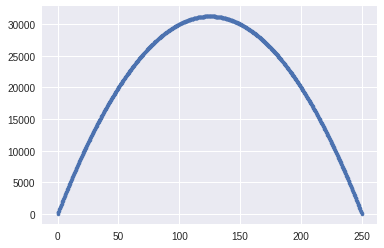

In [24]:
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

#math function A(y)
def func_y(y):
  return 500*y-2*y**2
#math function x = 500-2y
def func_x(y):
  return 500-2*y


x_data = np.linspace(0, 250, 1000)
y_data = func_y(x_data)
# Uncomment the following line to plot our input data.
pylab.plot(x_data, y_data, '.')
pylab.legend()
#pylab.xlim(-1, 5)
#pylab.ylim(-100, 150)

In [25]:
"""
2. one variable  method: using constraint to replace one variable 
   Run tensorflow gradient descent to answer the question.
   Code by tenserflow
"""
#初始值-5~300
y = tf.Variable(tf.random_uniform([1], -5,300))


func_tf = 1000000-func_y(y)#翻轉圖形,求最小值

loss = func_tf 
optimizer = tf.train.GradientDescentOptimizer(0.01) 
train = optimizer.minimize(loss)
init = tf.initialize_all_variables()

print("loss:", loss)
print("optimizer:", optimizer)
print("train:", train)
#print(init)

# 1.6 Create a session and launch the graph.
sess = tf.Session()
sess.run(init)

#print(sess.run([h]))

print("tf運算過程==========")
for step in range(160):
    sess.run(train)
    if step % 10 == 0 :#每學習20次顯示一次
      print(sess.run([y]))
    
print("\ntf運算結果==========")
result = sess.run([y])
result_y = np.array2string(result[0][0])
print("y = "+result_h)#show y
print("x = "+str(func_x(result[0][0])))#show x
print("A = "+str(func_y(result[0][0])))#show A

loss: Tensor("sub_21:0", shape=(1,), dtype=float32)
optimizer: <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x7f58226b6c50>
train: name: "GradientDescent_10"
op: "NoOp"
input: "^GradientDescent_10/update_Variable_11/ApplyGradientDescent"

tf運算過程==========
[array([154.1289], dtype=float32)]
[array([144.36584], dtype=float32)]
[array([137.87506], dtype=float32)]
[array([133.55977], dtype=float32)]
[array([130.69081], dtype=float32)]
[array([128.78343], dtype=float32)]
[array([127.51535], dtype=float32)]
[array([126.67228], dtype=float32)]
[array([126.11178], dtype=float32)]
[array([125.739136], dtype=float32)]
[array([125.4914], dtype=float32)]
[array([125.326706], dtype=float32)]
[array([125.2172], dtype=float32)]
[array([125.1444], dtype=float32)]
[array([125.096], dtype=float32)]
[array([125.06383], dtype=float32)]

tf運算結果==========
y = 124.964714
x = 249.9115753173828
A = 31249.996090537752


In [26]:
#安裝 Gaft 套件
!pip install gaft

In [27]:
"""
2. one variable  method: using constraint to replace one variable 
   run genetic algorithm answer the question.
   Code by GAFT基因演算法
"""

from math import sin, cos, pi

from gaft import GAEngine
from gaft.components import BinaryIndividual
from gaft.components import Population
from gaft.operators import TournamentSelection
from gaft.operators import UniformCrossover
from gaft.operators import FlipBitBigMutation

# Built-in best fitness analysis.
from gaft.analysis.fitness_store import FitnessStore
from gaft.analysis.console_output import ConsoleOutput


indv_template = BinaryIndividual(ranges=[(-5, 300)], eps=0.001)#初始值-5~300
population = Population(indv_template=indv_template, size=50).init()

selection = TournamentSelection()
crossover = UniformCrossover(pc=0.8, pe=0.5)
mutation = FlipBitBigMutation(pm=0.1, pbm=0.55, alpha=0.6)

engine = GAEngine(population=population, selection=selection,
                  crossover=crossover, mutation=mutation,
                  analysis=[ConsoleOutput, FitnessStore])

# Define fitness function.
@engine.fitness_register
def fitness(indv):
    y, = indv.solution
    return func_y(y)

if '__main__' == __name__:
  print("GAFT運算過程==========")
  engine.run(ng=150)
  print("\nGAFT運算結果==========")
  from best_fit import *
  
  result_y = str(best_fit[-1][1][0])
  result_x = str(func_x(best_fit[-1][1][0]))
  result_A = str(best_fit[-1][2])
  print("y = "+result_y)
  print("x = "+result_x)
  print("A = "+result_A)

GAFT運算過程==========
gaft.ConsoleOutput   INFO     Generation number: 150 Population number: 50
gaft.ConsoleOutput   INFO     Generation: 1, best fitness: 31220.757, scaled fitness: 31220.757
gaft.ConsoleOutput   INFO     Generation: 2, best fitness: 31220.757, scaled fitness: 31220.757
gaft.ConsoleOutput   INFO     Generation: 3, best fitness: 31220.757, scaled fitness: 31220.757
gaft.ConsoleOutput   INFO     Generation: 4, best fitness: 31235.157, scaled fitness: 31235.157
gaft.ConsoleOutput   INFO     Generation: 5, best fitness: 31235.157, scaled fitness: 31235.157
gaft.ConsoleOutput   INFO     Generation: 6, best fitness: 31235.157, scaled fitness: 31235.157
gaft.ConsoleOutput   INFO     Generation: 7, best fitness: 31249.385, scaled fitness: 31249.385
gaft.ConsoleOutput   INFO     Generation: 8, best fitness: 31249.859, scaled fitness: 31249.859
gaft.ConsoleOutput   INFO     Generation: 9, best fitness: 31249.868, scaled fitness: 31249.868
gaft.ConsoleOutput   INFO     Generation: 